In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

In [2]:
# Now import file

In [3]:
df =pd.read_excel('Height-Weight Data.xlsx')

In [4]:
df

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [5]:
# separate

In [6]:
x =df.drop('Height',axis=1)
y =df[['Height']]

In [7]:
x

,Weight
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [8]:
y

,Height
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
3496,185.649086
3497,210.198845
3498,202.429960
3499,144.277671


# Train Data Now

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest =train_test_split(x, y ,test_size=.25, random_state=1)

In [11]:
xtrain.head()

,Weight
525,68.624063
1792,68.829216
3314,69.197548
1562,67.867665
3086,65.234102


In [12]:
xtest.head()

,Weight
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [13]:
ytrain.head()

,Height
525,159.862467
1792,200.330819
3314,191.542329
1562,168.817572
3086,167.372980


In [14]:
ytest.head()

,Height
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


# Now Fit the data by Linear Regressin

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()  #Create object

In [17]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [18]:
xtrain

,Weight
525,68.624063
1792,68.829216
3314,69.197548
1562,67.867665
3086,65.234102
...,...
2763,68.457061
905,66.539812
1096,75.999957
235,70.555244


In [19]:
lr.predict(x)

array([[215.61486524],
       [185.3723065 ],
       [217.18570197],
       ...,
       [216.00614166],
       [177.09753426],
       [208.99898573]])

In [20]:
df['predict_y'] =lr.predict(x)

In [21]:
df[['predict_y']] 

,predict_y
0,215.614865
1,185.372306
2,217.185702
3,202.980513
4,191.939493
...,...
3496,188.446804
3497,195.882614
3498,216.006142
3499,177.097534


# Make Graph 

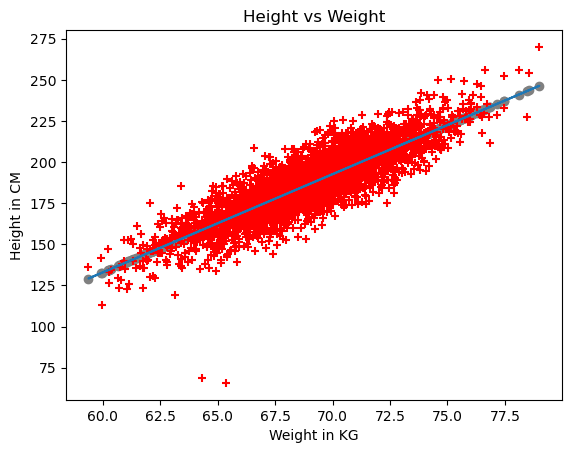

In [22]:
plt.plot(x, df['predict_y'] )
plt.xlabel('Weight in KG')
plt.ylabel('Height in CM')
plt.title('Height vs Weight')

plt.scatter(x,df['predict_y'] ,color='grey')
plt.scatter(x,df['Height'] ,color='red',marker='+')

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
mae = mean_absolute_error(ytest,lr.predict(xtest))

In [25]:
mae

8.226502913131542

In [26]:
mse = mean_squared_error(ytest, lr.predict(xtest))

In [27]:
mse

111.53431428776675

In [28]:
lr.score(xtest,ytest)

0.7370876521149996